Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 3.1) 국내 프로야구 연봉 예측

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [28]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [29]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [30]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [31]:
picher.head()

선수명   팀명   승   패  세  홀드  블론  경기  선발     이닝  ...  홈런/9  BABIP  LOB%   ERA  \
0   켈리   SK  16   7  0   0   0  30  30  190.0  ...  0.76  0.342  73.7  3.60   
1   소사   LG  11  11  1   0   0  30  29  185.1  ...  0.53  0.319  67.1  3.88   
2  양현종  KIA  20   6  0   0   0  31  31  193.1  ...  0.79  0.332  72.1  3.44   
3  차우찬   LG  10   7  0   0   0  28  28  175.2  ...  1.02  0.298  75.0  3.43   
4  레일리   롯데  13   7  0   0   0  30  30  187.1  ...  0.91  0.323  74.1  3.80   

   RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017)  
0     6.91  3.69  3.44  6.62    140000     85000  
1     6.80  3.52  3.41  6.08    120000     50000  
2     6.54  3.94  3.82  5.64    230000    150000  
3     6.11  4.20  4.03  4.63    100000    100000  
4     6.13  4.36  4.31  4.38    111000     85000  

[5 rows x 22 columns]

In [32]:
print(picher.shape)
picher.columns

(152, 22)


Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

-----

In [33]:
picher['선발'].describe()

count    152.000000
mean       6.092105
std        9.750093
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       31.000000
Name: 선발, dtype: float64

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [34]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [13]:
#picher = picher.drop('선발', axis=1)

In [35]:
print(picher.columns)

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')


In [36]:
print(picher_features_df)

      승   패  세  홀드  블론  경기  선발     이닝  삼진/9  볼넷/9  홈런/9  BABIP  LOB%    ERA  \
0    16   7  0   0   0  30  30  190.0  8.95  2.13  0.76  0.342  73.7   3.60   
1    11  11  1   0   0  30  29  185.1  7.43  1.85  0.53  0.319  67.1   3.88   
2    20   6  0   0   0  31  31  193.1  7.36  2.09  0.79  0.332  72.1   3.44   
3    10   7  0   0   0  28  28  175.2  8.04  1.95  1.02  0.298  75.0   3.43   
4    13   7  0   0   0  30  30  187.1  7.49  2.11  0.91  0.323  74.1   3.80   
..   ..  .. ..  ..  ..  ..  ..    ...   ...   ...   ...    ...   ...    ...   
147   2   5  0   0   2  33   5   62.2  4.31  3.30  1.58  0.355  56.9   7.76   
148   3   2  0   0   0  25  11   59.1  4.85  5.61  1.06  0.263  65.4   5.92   
149   0   2  0   0   0   9   2   14.2  4.91  4.91  2.45  0.382  52.8  11.66   
150   0   3  0   1   0  41   0   43.2  7.63  7.01  1.44  0.341  73.9   5.77   
151   4   4  0   0   0  24  14   81.0  5.78  5.89  2.00  0.312  65.3   7.67   

     RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017) 

-----

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [37]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [38]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        print(col)
        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [39]:
print(picher_features_df)

      승   패  세  홀드  블론  경기  선발     이닝  삼진/9  볼넷/9  홈런/9  BABIP  LOB%    ERA  \
0    16   7  0   0   0  30  30  190.0  8.95  2.13  0.76  0.342  73.7   3.60   
1    11  11  1   0   0  30  29  185.1  7.43  1.85  0.53  0.319  67.1   3.88   
2    20   6  0   0   0  31  31  193.1  7.36  2.09  0.79  0.332  72.1   3.44   
3    10   7  0   0   0  28  28  175.2  8.04  1.95  1.02  0.298  75.0   3.43   
4    13   7  0   0   0  30  30  187.1  7.49  2.11  0.91  0.323  74.1   3.80   
..   ..  .. ..  ..  ..  ..  ..    ...   ...   ...   ...    ...   ...    ...   
147   2   5  0   0   2  33   5   62.2  4.31  3.30  1.58  0.355  56.9   7.76   
148   3   2  0   0   0  25  11   59.1  4.85  5.61  1.06  0.263  65.4   5.92   
149   0   2  0   0   0   9   2   14.2  4.91  4.91  2.45  0.382  52.8  11.66   
150   0   3  0   1   0  41   0   43.2  7.63  7.01  1.44  0.341  73.9   5.77   
151   4   4  0   0   0  24  14   81.0  5.78  5.89  2.00  0.312  65.3   7.67   

     RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017) 

In [40]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)','선발']
picher_df = standard_scaling(picher, scale_columns)

승
int64
패
int64
세
int64
홀드
int64
블론
int64
경기
int64
이닝
float64
삼진/9
float64
볼넷/9
float64
홈런/9
float64
BABIP
float64
LOB%
float64
ERA
float64
RA9-WAR
float64
FIP
float64
kFIP
float64
WAR
float64
연봉(2018)
int64
연봉(2017)
int64
선발
int64


In [41]:
picher_df.head(5)

선수명   팀명         승         패         세        홀드        블론        경기  \
0   켈리   SK  3.313623  1.227145 -0.306452 -0.585705 -0.543592  0.059433   
1   소사   LG  2.019505  2.504721 -0.098502 -0.585705 -0.543592  0.059433   
2  양현종  KIA  4.348918  0.907751 -0.306452 -0.585705 -0.543592  0.111056   
3  차우찬   LG  1.760682  1.227145 -0.306452 -0.585705 -0.543592 -0.043811   
4  레일리   롯데  2.537153  1.227145 -0.306452 -0.585705 -0.543592  0.059433   

         선발        이닝  ...      홈런/9     BABIP      LOB%       ERA   RA9-WAR  \
0  2.452068  2.645175  ... -0.442382  0.016783  0.446615 -0.587056  3.174630   
1  2.349505  2.547755  ... -0.668521 -0.241686 -0.122764 -0.519855  3.114968   
2  2.554632  2.706808  ... -0.412886 -0.095595  0.308584 -0.625456  2.973948   
3  2.246942  2.350927  ... -0.186746 -0.477680  0.558765 -0.627856  2.740722   
4  2.452068  2.587518  ... -0.294900 -0.196735  0.481122 -0.539055  2.751570   

        FIP      kFIP       WAR  연봉(2018)  연봉(2017)  
0 -0.971030 -1.058125  4.503142  3.912893  2.734705  
1 -1.061888 -1.073265  4.094734  3.266495  1.337303  
2 -0.837415 -0.866361  3.761956  6.821679  5.329881  
3 -0.698455 -0.760385  2.998081  2.620098  3.333592  
4 -0.612941 -0.619085  2.809003  2.975617  2.734705  

[5 rows x 22 columns]

In [42]:
picher_df = picher_df.rename(columns={'선발': 'y'})
picher_df.head(5)

선수명   팀명         승         패         세        홀드        블론        경기  \
0   켈리   SK  3.313623  1.227145 -0.306452 -0.585705 -0.543592  0.059433   
1   소사   LG  2.019505  2.504721 -0.098502 -0.585705 -0.543592  0.059433   
2  양현종  KIA  4.348918  0.907751 -0.306452 -0.585705 -0.543592  0.111056   
3  차우찬   LG  1.760682  1.227145 -0.306452 -0.585705 -0.543592 -0.043811   
4  레일리   롯데  2.537153  1.227145 -0.306452 -0.585705 -0.543592  0.059433   

          y        이닝  ...      홈런/9     BABIP      LOB%       ERA   RA9-WAR  \
0  2.452068  2.645175  ... -0.442382  0.016783  0.446615 -0.587056  3.174630   
1  2.349505  2.547755  ... -0.668521 -0.241686 -0.122764 -0.519855  3.114968   
2  2.554632  2.706808  ... -0.412886 -0.095595  0.308584 -0.625456  2.973948   
3  2.246942  2.350927  ... -0.186746 -0.477680  0.558765 -0.627856  2.740722   
4  2.452068  2.587518  ... -0.294900 -0.196735  0.481122 -0.539055  2.751570   

        FIP      kFIP       WAR  연봉(2018)  연봉(2017)  
0 -0.971030 -1.058125  4.503142  3.912893  2.734705  
1 -1.061888 -1.073265  4.094734  3.266495  1.337303  
2 -0.837415 -0.866361  3.761956  6.821679  5.329881  
3 -0.698455 -0.760385  2.998081  2.620098  3.333592  
4 -0.612941 -0.619085  2.809003  2.975617  2.734705  

[5 rows x 22 columns]

-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [43]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [44]:
team_encoding.head(20)

KIA  KT  LG  NC  SK  두산  롯데  삼성  한화
0     0   0   0   0   1   0   0   0   0
1     0   0   1   0   0   0   0   0   0
2     1   0   0   0   0   0   0   0   0
3     0   0   1   0   0   0   0   0   0
4     0   0   0   0   0   0   1   0   0
5     0   1   0   0   0   0   0   0   0
6     0   1   0   0   0   0   0   0   0
7     0   0   0   0   0   1   0   0   0
8     0   0   0   0   0   1   0   0   0
9     1   0   0   0   0   0   0   0   0
10    0   0   0   0   0   0   0   1   0
11    0   0   0   0   0   1   0   0   0
12    1   0   0   0   0   0   0   0   0
13    0   0   0   0   0   0   1   0   0
14    0   0   0   0   0   0   0   1   0
15    0   0   0   0   0   0   1   0   0
16    0   0   1   0   0   0   0   0   0
17    0   0   0   0   0   0   0   1   0
18    0   0   1   0   0   0   0   0   0
19    0   0   0   0   0   0   1   0   0

In [45]:
picher_df.head()

선수명         승         패         세        홀드        블론        경기         y  \
0   켈리  3.313623  1.227145 -0.306452 -0.585705 -0.543592  0.059433  2.452068   
1   소사  2.019505  2.504721 -0.098502 -0.585705 -0.543592  0.059433  2.349505   
2  양현종  4.348918  0.907751 -0.306452 -0.585705 -0.543592  0.111056  2.554632   
3  차우찬  1.760682  1.227145 -0.306452 -0.585705 -0.543592 -0.043811  2.246942   
4  레일리  2.537153  1.227145 -0.306452 -0.585705 -0.543592  0.059433  2.452068   

         이닝      삼진/9  ...  연봉(2017)  KIA  KT  LG  NC  SK  두산  롯데  삼성  한화  
0  2.645175  0.672099  ...  2.734705    0   0   0   0   1   0   0   0   0  
1  2.547755  0.134531  ...  1.337303    0   0   1   0   0   0   0   0   0  
2  2.706808  0.109775  ...  5.329881    1   0   0   0   0   0   0   0   0  
3  2.350927  0.350266  ...  3.333592    0   0   1   0   0   0   0   0   0  
4  2.587518  0.155751  ...  2.734705    0   0   0   0   0   0   1   0   0  

[5 rows x 30 columns]

-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [47]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y'] #선발을 y로 놓음...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [48]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)  # 선(평면)을 찾음.....

In [49]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

[ 1.34286093e-02 -2.94282828e-02  2.08236222e-01  4.37526967e-02
 -3.30490113e-02  7.66839742e-03  1.22263795e-02 -5.70187493e-02
 -1.01644443e-01  2.83395386e-02 -5.65130185e-02  2.62067515e-03
 -3.90049094e-01 -5.78828740e-03  1.36994870e-01 -6.60069219e-02
 -4.38334096e-02 -6.29490786e-02  8.96065827e-02  1.18908980e-02
  5.40423475e-04  4.58809723e-02 -5.25352224e-02  1.04682416e+00
  1.44965099e-01 -5.79503761e-02 -4.89986918e-02 -1.68452412e-01]


In [51]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', 'y', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성',
       '한화'],
      dtype='object')

-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [52]:
!pip install statsmodels

In [53]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     171.1
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           9.12e-68
Time:                        11:30:48   Log-Likelihood:                 68.820
No. Observations:                 121   AIC:                            -81.64
Df Residuals:                      93   BIC:                            -3.357
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0073      0.013     -0.557      0.579      -0.033       0.019
BABIP          0.0134      0.024      0.549      0.584      -0.035       0.062
ERA           -0.0294      0.044     -0.675      0.501      -0.116       0.057
FIP            0.2082      1.783      0.117      0.907      -3.333       3.750
KIA            0.0429      0.042      1.030      0.306      -0.040       0.126
KT            -0.0339      0.040     -0.845      0.400      -0.113       0.046
LG             0.0069      0.045      0.152      0.880      -0.083       0.097
LOB%           0.0122      0.030      0.414      0.680      -0.046       0.071
NC            -0.0578      0.050     -1.163      0.248      -0.157       0.041
RA9-WAR       -0.1016      0.055     -1.859      0.066      -0.210       0.007
SK             0.0275      0.042      0.653      0.515      -0.056       0.111
WAR           -0.0565      0.051     -1.101      0.274      -0.158       0.045
kFIP           0.0026      1.504      0.002      0.999      -2.984       2.989
경기            -0.3900      0.038    -10.159      0.000      -0.466      -0.314
두산            -0.0066      0.049     -0.135      0.893      -0.103       0.090
롯데             0.1362      0.046      2.950      0.004       0.044       0.228
볼넷/9          -0.0660      0.119     -0.556      0.580      -0.302       0.170
블론            -0.0438      0.023     -1.901      0.060      -0.090       0.002
삼성            -0.0638      0.047     -1.369      0.174      -0.156       0.029
삼진/9           0.0896      0.137      0.653      0.515      -0.183       0.362
세              0.0119      0.024      0.488      0.626      -0.036       0.060
승              0.0005      0.042      0.013      0.990      -0.082       0.083
연봉(2017)       0.0459      0.044      1.041      0.300      -0.042       0.133
연봉(2018)      -0.0525      0.060     -0.874      0.384      -0.172       0.067
이닝             1.0468      0.061     17.097      0.000       0.925       1.168
패              0.1450      0.033      4.357      0.000       0.079       0.211
한화            -0.0588      0.041     -1.425      0.157      -0.141       0.023
홀드            -0.0490      0.030     -1.609      0.111      -0.109       0.011
홈런/9          -0.1685      0.317     -0.531      0.596      -0.798       0.461
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.859
Skew:                           0.082   Prob(JB):                        0.651
Kurtosis:                       3.379   Cond. No.                     3.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '세'),
 Text(21, 0, '승'),
 Text(22, 0, '연봉(2017)'),
 Text(23, 0, '연봉(2018)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

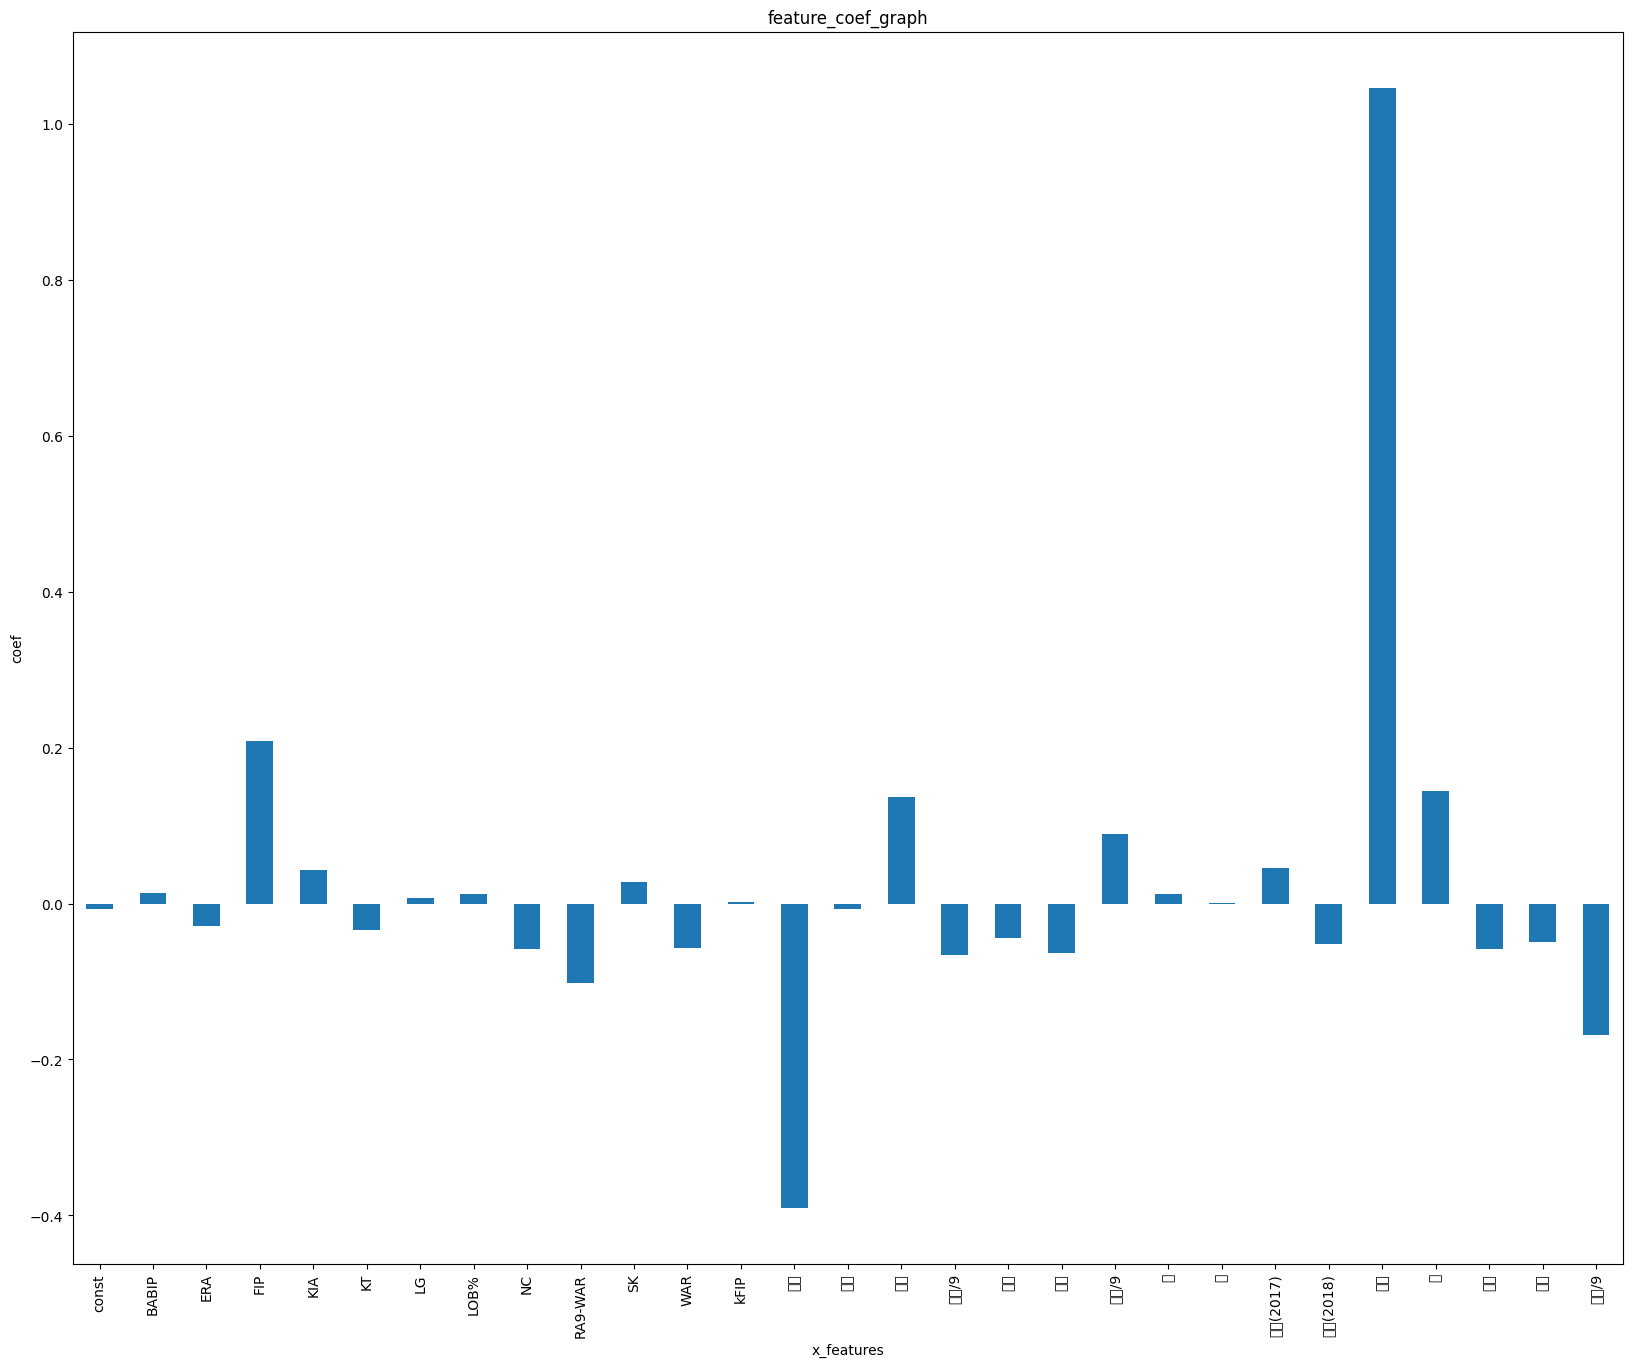

In [54]:
# 한글 출력을 위한 사전 설정 단계입니다.
#mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

-----

### [예측 모델의 평가]

In [55]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # 선수명과 y를 뺀 것을 모두 X로 놓는다.
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [56]:
print(X)

        BABIP       ERA       FIP  KIA  KT  LG      LOB%  NC   RA9-WAR  SK  \
0    0.016783 -0.587056 -0.971030    0   0   0  0.446615   0  3.174630   1   
1   -0.241686 -0.519855 -1.061888    0   0   1 -0.122764   0  3.114968   0   
2   -0.095595 -0.625456 -0.837415    1   0   0  0.308584   0  2.973948   0   
3   -0.477680 -0.627856 -0.698455    0   0   1  0.558765   0  2.740722   0   
4   -0.196735 -0.539055 -0.612941    0   0   0  0.481122   0  2.751570   0   
..        ...       ...       ...  ...  ..  ..       ...  ..       ...  ..   
147  0.162874  0.411349  0.375810    0   0   0 -1.002712   0 -1.229537   0   
148 -0.871003 -0.030253  0.482702    1   0   0 -0.269422   0 -0.361721   0   
149  0.466294  1.347354  1.348527    0   0   0 -1.356417   0 -1.023431   0   
150  0.005545 -0.066253  0.728554    0   0   0  0.463869   0 -0.790205   0   
151 -0.320351  0.389749  1.118709    0   1   0 -0.278049   0 -0.942073   0   

     ...      삼진/9         세         승  연봉(2017)  연봉(2018)     

In [58]:
# 이 부분추가...
y_predictions = lr.predict(X_test)
print(y_predictions)
print(list(y_test))

[ 2.36208091 -1.34695029 -0.67074577 -0.47518372 -0.25360508  2.40473639
  1.4379564  -0.53564409 -0.6579089  -0.44467715 -0.2526738   1.64717109
 -0.22089949 -0.7027716  -0.5169315  -0.51783606 -0.77238807  0.59093986
 -0.45147121  1.67196972 -0.83464012  0.46057767 -0.71315171  0.58721104
 -0.53301472 -0.12460549 -0.12302172 -0.60929363 -0.36998847 -0.61936069
  1.99527314]
[2.5546315755772686, -0.6248253668738908, -0.6248253668738908, -0.4196991125222031, -0.3171359853463593, 2.349505321225581, 1.8366896853463617, -0.522262239698047, -0.6248253668738908, -0.6248253668738908, -0.4196991125222031, 1.9392528125222055, -0.3171359853463593, -0.6248253668738908, -0.6248253668738908, -0.6248253668738908, -0.6248253668738908, 0.8110584135879231, -0.6248253668738908, 2.0418159396980493, -0.6248253668738908, 0.6059321592362353, -0.6248253668738908, -0.009446603818827719, -0.6248253668738908, 0.09311652335701613, -0.11200973099467157, -0.6248253668738908, -0.6248253668738908, -0.31713598534635

In [59]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [60]:
#예측값을 예측연본(2018)에 추가
picher_df['예측선발'] = pd.Series(y_predictions)

In [62]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '선발']]

# 원래의 데이터 프레임에 선발 정보를 합칩니다.
#result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df = picher_df
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측선발', '선발']]
result_df.columns = ['선수명', '실제선발', '예측선발', '선발']


result_df.head(10)

선수명      실제선발      예측선발  선발
0    켈리  2.452068  2.362081  30
1    소사  2.349505 -1.346950  29
2   양현종  2.554632 -0.670746  31
3   차우찬  2.246942 -0.475184  28
4   레일리  2.452068 -0.253605  30
5  피어밴드  2.041816  2.404736  26
6   고영표  1.836690  1.437956  24
7   장원준  2.349505 -0.535644  29
8   함덕주  1.836690 -0.657909  24
9    팻딘  2.349505 -0.444677  29

-----

-----

-----